# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests
url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')


To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <td>
   <a class="w" href="/exchange-rate-history/usd-idr-2023-12-18">
    December 18, 2023
   </a>
   <a class="n" href="/exchange-rate-history/usd-idr-2023-12-18">
    2023-12-18
   </a>
  </td>
  <td>
   <span class="w">
    <span class="nowrap">
     <span class="currencySymbol">
      $
     </span>
     1 =
    </span>
    <span class="nowrap">
     <span class="currencySymbol">
      Rp
     </span>
     15,452
    </span>
   </span>
   <span class="n">
    <span class="n


Finding row length.

In [6]:
row = table.find_all('a',attrs={'class':'w'})
row_length = len(row)
row_length

129

Do the scrapping process here (please change this markdown with your explanation)

In [7]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process

    #get date
    date = table.find_all('a',attrs={'class':'n'})[i].text

    #get USD Dollar
    kurs = table.find_all('span',attrs={'class':'n'})[i].text

    temp.append((date,kurs))

temp
    
temp 

[('2023-12-18', '$1 = Rp15,452'),
 ('2023-12-15', '$1 = Rp15,529'),
 ('2023-12-14', '$1 = Rp15,476'),
 ('2023-12-13', '$1 = Rp15,360'),
 ('2023-12-12', '$1 = Rp15,576'),
 ('2023-12-11', '$1 = Rp15,653'),
 ('2023-12-8', '$1 = Rp15,573'),
 ('2023-12-7', '$1 = Rp15,507'),
 ('2023-12-6', '$1 = Rp15,514'),
 ('2023-12-5', '$1 = Rp15,463'),
 ('2023-12-4', '$1 = Rp15,485'),
 ('2023-12-1', '$1 = Rp15,413'),
 ('2023-11-30', '$1 = Rp15,559'),
 ('2023-11-29', '$1 = Rp15,459'),
 ('2023-11-28', '$1 = Rp15,352'),
 ('2023-11-27', '$1 = Rp15,505'),
 ('2023-11-24', '$1 = Rp15,540'),
 ('2023-11-23', '$1 = Rp15,633'),
 ('2023-11-22', '$1 = Rp15,656'),
 ('2023-11-21', '$1 = Rp15,517'),
 ('2023-11-20', '$1 = Rp15,389'),
 ('2023-11-17', '$1 = Rp15,424'),
 ('2023-11-16', '$1 = Rp15,484'),
 ('2023-11-15', '$1 = Rp15,519'),
 ('2023-11-14', '$1 = Rp15,459'),
 ('2023-11-13', '$1 = Rp15,683'),
 ('2023-11-10', '$1 = Rp15,694'),
 ('2023-11-9', '$1 = Rp15,715'),
 ('2023-11-8', '$1 = Rp15,625'),
 ('2023-11-7', '$1 = R

In [8]:
temp = temp[::-1]
temp

[('2023-6-21', '$1 = Rp14,945'),
 ('2023-6-22', '$1 = Rp14,939'),
 ('2023-6-23', '$1 = Rp15,045'),
 ('2023-6-26', '$1 = Rp15,045'),
 ('2023-6-27', '$1 = Rp14,988'),
 ('2023-6-28', '$1 = Rp14,985'),
 ('2023-6-29', '$1 = Rp15,059'),
 ('2023-6-30', '$1 = Rp15,040'),
 ('2023-7-3', '$1 = Rp15,063'),
 ('2023-7-4', '$1 = Rp15,020'),
 ('2023-7-5', '$1 = Rp15,078'),
 ('2023-7-6', '$1 = Rp15,178'),
 ('2023-7-7', '$1 = Rp15,162'),
 ('2023-7-10', '$1 = Rp15,187'),
 ('2023-7-11', '$1 = Rp15,140'),
 ('2023-7-12', '$1 = Rp14,935'),
 ('2023-7-13', '$1 = Rp14,954'),
 ('2023-7-14', '$1 = Rp15,003'),
 ('2023-7-17', '$1 = Rp14,972'),
 ('2023-7-18', '$1 = Rp14,989'),
 ('2023-7-19', '$1 = Rp15,009'),
 ('2023-7-20', '$1 = Rp15,056'),
 ('2023-7-21', '$1 = Rp15,043'),
 ('2023-7-24', '$1 = Rp15,022'),
 ('2023-7-25', '$1 = Rp15,027'),
 ('2023-7-26', '$1 = Rp15,009'),
 ('2023-7-27', '$1 = Rp15,102'),
 ('2023-7-28', '$1 = Rp15,107'),
 ('2023-7-31', '$1 = Rp15,099'),
 ('2023-8-1', '$1 = Rp15,121'),
 ('2023-8-2', '$

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns =('Date','Kurs'))
df.head()

,Date,Kurs
0,2023-6-21,"$1 = Rp14,945"
1,2023-6-22,"$1 = Rp14,939"
2,2023-6-23,"$1 = Rp15,045"
3,2023-6-26,"$1 = Rp15,045"
4,2023-6-27,"$1 = Rp14,988"


In [10]:
df.dtypes

Date    object
Kurs    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [11]:
df['Date']=df['Date'].astype('datetime64[ns]')
df.dtypes
df

,Date,Kurs
0,2023-06-21,"$1 = Rp14,945"
1,2023-06-22,"$1 = Rp14,939"
2,2023-06-23,"$1 = Rp15,045"
3,2023-06-26,"$1 = Rp15,045"
4,2023-06-27,"$1 = Rp14,988"
...,...,...
124,2023-12-12,"$1 = Rp15,576"
125,2023-12-13,"$1 = Rp15,360"
126,2023-12-14,"$1 = Rp15,476"
127,2023-12-15,"$1 = Rp15,529"


In [12]:
df.dtypes

Date    datetime64[ns]
Kurs            object
dtype: object

In [13]:
df['Kurs']=df['Kurs'].replace(',',' ')
df


,Date,Kurs
0,2023-06-21,"$1 = Rp14,945"
1,2023-06-22,"$1 = Rp14,939"
2,2023-06-23,"$1 = Rp15,045"
3,2023-06-26,"$1 = Rp15,045"
4,2023-06-27,"$1 = Rp14,988"
...,...,...
124,2023-12-12,"$1 = Rp15,576"
125,2023-12-13,"$1 = Rp15,360"
126,2023-12-14,"$1 = Rp15,476"
127,2023-12-15,"$1 = Rp15,529"


In [14]:
df['Kurs']=df['Kurs'].str[-6:]

In [15]:
df['Kurs']=df['Kurs'].str.replace(',','')
df

,Date,Kurs
0,2023-06-21,14945
1,2023-06-22,14939
2,2023-06-23,15045
3,2023-06-26,15045
4,2023-06-27,14988
...,...,...
124,2023-12-12,15576
125,2023-12-13,15360
126,2023-12-14,15476
127,2023-12-15,15529


In [16]:
df.dtypes

Date    datetime64[ns]
Kurs            object
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [17]:
df['Kurs']=df['Kurs'].astype('int')

In [18]:
df=df.set_index('Date')
df

,Kurs
Date,
2023-06-21,14945
2023-06-22,14939
2023-06-23,15045
2023-06-26,15045
2023-06-27,14988
...,...
2023-12-12,15576
2023-12-13,15360
2023-12-14,15476


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<Axes: xlabel='Date'>

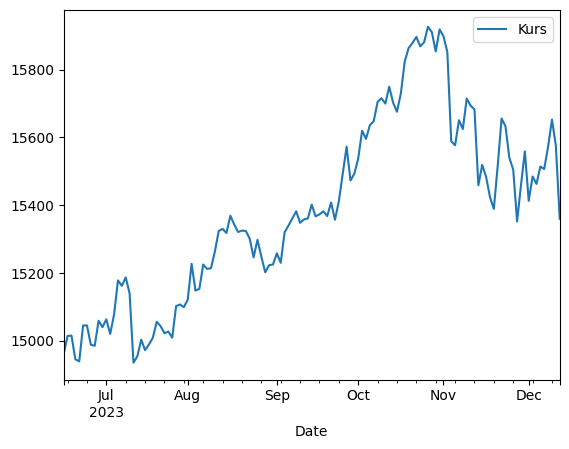

In [112]:
df.plot()


(Put your analysis and conclusion here.)

1. Terdapat kenaikan kurs secara signifikan pada bulan Oktober sampai november kemudian mengalami penurunan pada BUlan Desember
2. Secara tren nilai kurs mengalami peningkatan dari Bulan Juli hingga Bulan Desember

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.